In [1]:
import pandas as pd 
import numpy as np

In [2]:
data = pd.read_csv('wine_data_processed.csv')

xin = data.drop('quality', axis='columns')
yout = data['quality']

In [3]:

# 75-25 split 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

xin_train, xin_test, yout_train, yout_test = train_test_split(xin, yout, test_size=0.25, random_state=42)


# Data balancing
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
xin_train, yout_train = ros.fit_resample(xin_train, yout_train)
print(yout_train.value_counts())

quality
6    2102
5    2102
7    2102
Name: count, dtype: int64


In [4]:
# function for forward feature selection using KNN

print("The below code will help in identifying the most relevant features with a forward search using the k-Nearest Neighbors algorithm.")

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

def forward_feature_selection_using_knn(x_train, x_test, y_train, y_test):
    # store the selected features
    selected_features = []  
    max_accuracy = 0
    
    while len(selected_features) < x_train.shape[1]:
        best_feature = None
        for feature in x_train.columns:
            if feature not in selected_features:
                selected_features.append(feature)
                knn = KNeighborsClassifier(n_neighbors=5)
                # Train the KNN using only the selected features
                knn.fit(x_train[selected_features], y_train)
                # Predict on the test set
                y_pred = knn.predict(x_test[selected_features])
                # Calculate accuracy
                accuracy = accuracy_score(y_test, y_pred)
                # Check if adding this feature improves the accuracy
                print(f"Selected Feature: {selected_features}")
                print(f"Accuracy: {accuracy}")
                if accuracy > max_accuracy:
                    max_accuracy = accuracy
                    best_feature = feature
                selected_features.remove(feature)
        # if the feature improves accuracy then add it to the set of selected features        
        if best_feature is not None:
            selected_features.append(best_feature)
        else:
            break;
    return selected_features

print(xin_train.shape)

# Select the combination where we can achieve a higher accuracy with comparitively low num of features.
selected_features = forward_feature_selection_using_knn(xin_train, xin_test, yout_train, yout_test)
print("Final selected features:", selected_features)

The below code will help in identifying the most relevant features with a forward search using the k-Nearest Neighbors algorithm.
(6306, 12)
Selected Feature: ['fixed acidity']
Accuracy: 0.4035667107001321
Selected Feature: ['volatile acidity']
Accuracy: 0.42932628797886396
Selected Feature: ['citric acid']
Accuracy: 0.39299867899603697
Selected Feature: ['residual sugar']
Accuracy: 0.45310435931307796
Selected Feature: ['chlorides']
Accuracy: 0.40885072655217963
Selected Feature: ['free sulfur dioxide']
Accuracy: 0.37318361955085866
Selected Feature: ['total sulfur dioxide']
Accuracy: 0.42602377807133424
Selected Feature: ['density']
Accuracy: 0.45904887714663145
Selected Feature: ['pH']
Accuracy: 0.38110964332893
Selected Feature: ['sulphates']
Accuracy: 0.40752972258916775
Selected Feature: ['alcohol']
Accuracy: 0.45772787318361957
Selected Feature: ['wine_type']
Accuracy: 0.3414795244385733
Selected Feature: ['density', 'fixed acidity']
Accuracy: 0.4795244385733157
Selected Feature

From the results above, it is clear that the model performs best when using 5 features, namely, 'density', 'residual sugar', 'alcohol', 'volatile acidity', 'wine_type'.

Further, we will train the model using the training datset of these 5 features and then predict the labels for the test data. 
We will compute the training as well as the testing time and also computer the accuracy score and confusion metrics.

   density  residual sugar  alcohol  volatile acidity  wine_type
0   0.9978             1.9      9.4              0.70          1
1   0.9968             2.6      9.8              0.88          1
2   0.9970             2.3      9.8              0.76          1
3   0.9980             1.9      9.8              0.28          1
4   0.9978             1.9      9.4              0.70          1
Training Time:  0.0029544830322265625
Testing Time:  0.033229827880859375
Accuracy of KNN on test set:  0.6089828269484808


<Figure size 800x600 with 0 Axes>

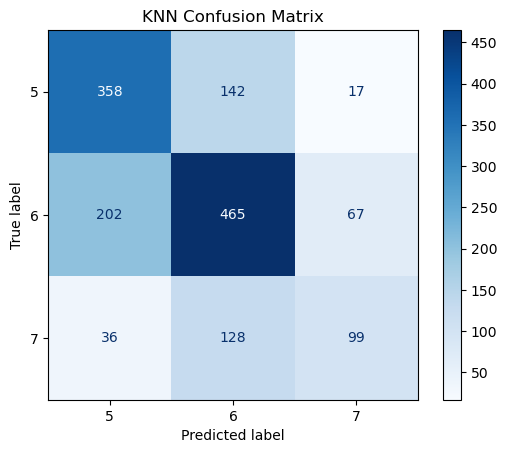

In [5]:
# training, prediction and record training time, accuracy and confusion matrix
import time 
from sklearn.metrics import ConfusionMatrixDisplay

xin_selected_features = xin[selected_features]
print(xin_selected_features.head())
x_train, x_test, y_train, y_test = train_test_split(xin_selected_features, yout,test_size = 0.25, random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)
start = time.time()
knn.fit(x_train, y_train)
stop = time.time()
print("Training Time: ", stop - start)

start = time.time()
y_pred = knn.predict(x_test)
stop = time.time()
print("Testing Time: ", stop - start)

print('Accuracy of KNN on test set: ', accuracy_score(y_test,y_pred))

import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=[5, 6, 7], cmap='Blues')
plt.title('KNN Confusion Matrix')
plt.show()


In [6]:
# forward feature selection using decision tree classifier

print("The below code will help in identifying the most relevant features with a forward search using the Decision Tree algorithm.")

from sklearn.tree import DecisionTreeClassifier

def forward_feature_selection_using_dtc(x_train, x_test, y_train, y_test):
    # store the selected features
    selected_features = []  
    max_accuracy = 0.0
    
    while len(selected_features) < x_train.shape[1]:
        best_feature = None
        for feature in x_train.columns:
            if feature not in selected_features:
                selected_features.append(feature)
                dtc = DecisionTreeClassifier()
                # Train 
                dtc.fit(x_train[selected_features], y_train)
                # Predict on the test set
                y_pred = dtc.predict(x_test[selected_features])
                # Calculate accuracy
                accuracy = accuracy_score(y_test, y_pred)
                # Check if adding this feature improves the accuracy
                print(f"Selected Feature: {selected_features}")
                print(f"Accuracy: {accuracy}")
                if accuracy > max_accuracy:
                    max_accuracy = accuracy
                    best_feature = feature
                selected_features.remove(feature)
        # if the feature improves accuracy then add it to the set of selected features        
        if best_feature is not None:
            selected_features.append(best_feature)
        else:
            break;
    return selected_features

# Select the combination where we can achieve a higher accuracy with comparitively low num of features.
selected_features = forward_feature_selection_using_knn(xin_train, xin_test, yout_train, yout_test)
print("Final selected features:", selected_features)

The below code will help in identifying the most relevant features with a forward search using the Decision Tree algorithm.
Selected Feature: ['fixed acidity']
Accuracy: 0.4035667107001321
Selected Feature: ['volatile acidity']
Accuracy: 0.42932628797886396
Selected Feature: ['citric acid']
Accuracy: 0.39299867899603697
Selected Feature: ['residual sugar']
Accuracy: 0.45310435931307796
Selected Feature: ['chlorides']
Accuracy: 0.40885072655217963
Selected Feature: ['free sulfur dioxide']
Accuracy: 0.37318361955085866
Selected Feature: ['total sulfur dioxide']
Accuracy: 0.42602377807133424
Selected Feature: ['density']
Accuracy: 0.45904887714663145
Selected Feature: ['pH']
Accuracy: 0.38110964332893
Selected Feature: ['sulphates']
Accuracy: 0.40752972258916775
Selected Feature: ['alcohol']
Accuracy: 0.45772787318361957
Selected Feature: ['wine_type']
Accuracy: 0.3414795244385733
Selected Feature: ['density', 'fixed acidity']
Accuracy: 0.4795244385733157
Selected Feature: ['density', 'vo

From the results above, it is clear that the model performs best when using 5 features, namely, 'density', 'residual sugar', 'alcohol', 'volatile acidity', 'wine_type'.

Further, we will train the model using the training datset of these 5 features and then predict the labels for the test data. 
We will compute the training as well as the testing time and also computer the accuracy score and confusion metrics.

   density  residual sugar  alcohol  volatile acidity  wine_type
0   0.9978             1.9      9.4              0.70          1
1   0.9968             2.6      9.8              0.88          1
2   0.9970             2.3      9.8              0.76          1
3   0.9980             1.9      9.8              0.28          1
4   0.9978             1.9      9.4              0.70          1
Training Time:  0.015247821807861328
Testing Time:  0.0
Accuracy of Decision Tree Classifier on test set:  0.6644649933949802


<Figure size 800x600 with 0 Axes>

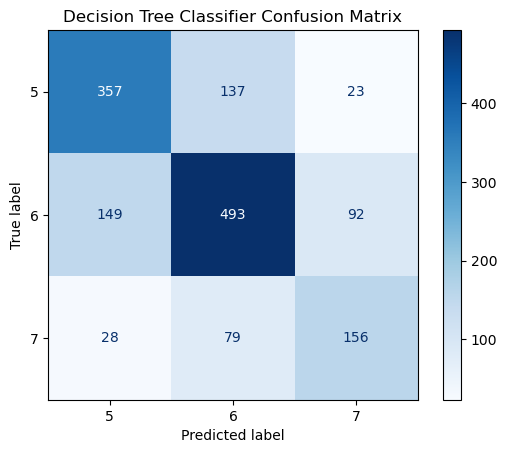

In [14]:
# training, prediction and record training time, accuracy and confusion matrix
import time 
from sklearn.metrics import ConfusionMatrixDisplay

xin_selected_features = xin[selected_features]
print(xin_selected_features.head())
x_train, x_test, y_train, y_test = train_test_split(xin_selected_features, yout,test_size = 0.25, random_state=42)

start = time.time()
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)
stop = time.time()
print("Training Time: ", stop - start)

start = time.time()
y_pred = dtc.predict(x_test)
stop = time.time()
print("Testing Time: ", stop - start)

print('Accuracy of Decision Tree Classifier on test set: ', accuracy_score(y_test,y_pred))

import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=[5, 6, 7], cmap='Blues')
plt.title('Decision Tree Classifier Confusion Matrix')
plt.show()